# *Introduction to Pandas*

In [1]:
%matplotlib inline
# imports a fast numerical programming library
import numpy as np
# imports stats functions, amongst other things
import scipy as sp 
# imports matplotlib
import matplotlib as mpl
# allows us easy access to colormaps
import matplotlib.cm as cm 
# sets up plotting under plt
import matplotlib.pyplot as plt
# let's us hamdle data as dataframes
import pandas as pd


In [51]:
# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

## 1. Load the data
We'll read in some data from a CSV file. CSV files can be output by any spreadsheet software, and are plain text, so make a great way to share data. This dataset is scraped from *Goodreads*.

In [3]:
df = pd.read_csv('./data/all.csv', header=None,
                 names=['rating', 'review_count', 'isbn', 'booktype', 
                        'author_url', 'year', 'genre_urls', 'dir', 
                        'rating_count', 'name'])
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


We have a table! A spreadsheet! And it indexed the rows.<br>
`df` is an instance of the `pd.DataFrame` class, creating by calling the `pd.read_csv` function, which calls the `DataFrame constructor` inside of it. What you need to take away is that `df` is a dataframe object, and it has `methods`, or `functions` belonging to it, which allow it to do things; for e.g. `df.head()` is a method that shows the first 5 rows of the dataframe.

<img src='./data/dataframe-object.png' width=700 height=400>

## 2. The basics

In [5]:
df.dtypes

rating          float64
review_count    float64
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count    float64
name             object
dtype: object

In [6]:
df.shape

(6000, 10)

6000 rows times 10 columns. A spreadsheet is a table, is a matrix. How can we access members of this `tuple`:

In [7]:
df.shape[0], df.shape[1]

(6000, 10)

These are the column names:

In [8]:
df.columns

Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

As the diagram above shows, `Pandas` considers a table (dataframe) as a pasting of many 'series' together, horizontally.

In [9]:
type(df.rating), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

## 3. Quering
A spreadsheet is useless if you can't dice/sort/etc it. Here we look for all books with a rating less than 3:

In [10]:
df.rating < 3

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Name: rating, Length: 6000, dtype: bool

This gives us `True`s and `False`s. Such a series is called a *mask*. If we count the number of `True`s, and divide by the total, we'll get the fraction of `ratings < 3`:

In [11]:
np.sum(df.rating < 3)

np.int64(4)

In [12]:
np.sum(df.rating < 3) / df.shape[0] # or np.mean(df.rating < 3)

np.float64(0.0006666666666666666)

In [13]:
# Directly in Pandas
(df.rating < 3).mean()

np.float64(0.0006666666666666666)

## 4. Filtering
Here are two ways to get a filtered dataframe:

In [14]:
df.query('rating > 4.5')

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314.0,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973.0,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495.0,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777.0,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007.0,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018.0,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256.0,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000.0,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992.0,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404.0,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010.0,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330.0,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644.0,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005.0,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674.0,The Complete Calvin and Hobbes
...,...,...,...,...,...,...,...,...,...,...
5806,4.57,121.0,0679777458,good_reads:book,https://www.goodreads.com/author/show/8361.Dor...,1966.0,/genres/historical-fiction|/genres/fiction|/ge...,dir59/351211.The_Disorderly_Knights.html,2177.0,"The Disorderly Knights (The Lymond Chronicles,..."
5873,4.55,103.0,144247372X,good_reads:book,https://www.goodreads.com/author/show/2876763....,2012.0,/genres/fantasy|/genres/paranormal|/genres/ang...,dir59/14367071-the-complete-hush-hush-saga.html,2869.0,"The Complete Hush, Hush Saga"
5874,4.78,18.0,2851944371,good_reads:book,https://www.goodreads.com/author/show/318835.O...,1972.0,/genres/poetry|/genres/fiction|/genres/nobel-p...,dir59/2014000.Le_Monogramme.html,565.0,Le Monogramme
5880,4.61,123.0,NaN,good_reads:book,https://www.goodreads.com/author/show/4942228....,2010.0,/genres/romance|/genres/m-m-romance|/genres/sc...,dir59/10506860-the-interludes.html,1031.0,"The Interludes (In the company of shadows, #3)"


In [15]:
df[df.year < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
47,3.68,5785.0,0143039954,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248.0,The Odyssey
246,4.01,365.0,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123.0,The Iliad/The Odyssey
455,3.85,1499.0,0140449140,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-380.0,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022.0,The Republic
596,3.77,1240.0,0679729526,good_reads:book,https://www.goodreads.com/author/show/919.Virgil,-29.0,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308.0,The Aeneid
629,3.64,1231.0,1580495931,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-429.0,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192.0,Oedipus Rex
674,3.92,3559.0,1590302257,good_reads:book,https://www.goodreads.com/author/show/1771.Sun...,-512.0,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619.0,The Art of War
746,4.06,1087.0,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634.0,The Bhagavad Gita
777,3.52,1038.0,1580493882,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-442.0,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084.0,Antigone
1233,3.94,704.0,015602764X,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-400.0,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008.0,The Oedipus Cycle
1397,4.03,890.0,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259.0,Aesop's Fables


In [18]:
df[(df.year < 0) & (df.rating > 4.1)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3133,4.30,131.0,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454.0,Complete Works
4475,4.11,281.0,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390.0,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478.0,Apology


## 5. Cleaning
We checked the datatypes. Notice that `review_count`, `rating_count`, are of type `object` (which means they are either strings or Pandas coudn't figure what they are), while `year` is a float.<br>
Suppose we try to fix this:

In [19]:
df['rating_count'] = df.rating_count.astype(int)
df['review_count'] = df.review_count.astype(int)
df['year'] = df.year.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Something is not right. It's trying to convert some Python datatype: `None` into an `int`. This usually means some data was missing. Was it?

In [20]:
df[df.rating_count.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dir37/9658936-harry-potter.html,NaN,NaN
5282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dir53/113138.The_Winner.html,NaN,NaN


In [21]:
df[df.review_count.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dir37/9658936-harry-potter.html,NaN,NaN
5282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dir53/113138.The_Winner.html,NaN,NaN


In [22]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526.0,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134.0,La Tahzan
2869,4.61,2.0,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23.0,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dir37/9658936-harry-potter.html,NaN,NaN
5282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dir53/113138.The_Winner.html,NaN,NaN
5572,3.71,35.0,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403.0,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44.0,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850.0,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204.0,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895.0,"Tiger's Dream (The Tiger Saga, #5)"


In [23]:
df = df[df.year.notnull()]
df = df[df.rating_count.notnull()]
df = df[df.review_count.notnull()]

In [24]:
df.shape

(5993, 10)

In [25]:
df['rating_count'] = df.rating_count.astype(int)
df['review_count'] = df.review_count.astype(int)
df['year'] = df.year.astype(int)

In [26]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

## 6. Visualizing
Pandas has a handy built-in visualization.

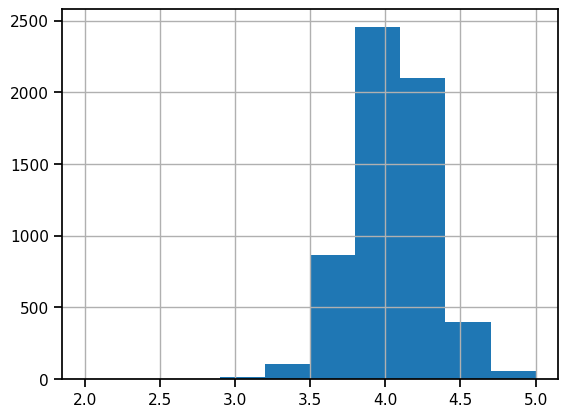

In [52]:
df.rating.hist();

4.041997330218589 4.041997330218589 4.05


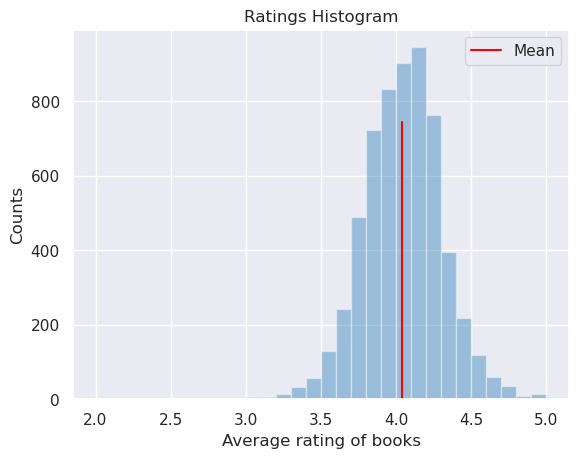

In [53]:
import seaborn as sns
sns.set_context('notebook')

meanrat = df.rating.mean()
print(meanrat, np.mean(df.rating), df.rating.median())
with sns.axes_style('darkgrid'):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel('Average rating of books')
    plt.ylabel('Counts')
    plt.title('Ratings Histogram')
    plt.legend()

One can see the sparseness of review counts. This will be important when we learn about recommendations: we'll have to *regularize* our models to deal with it.

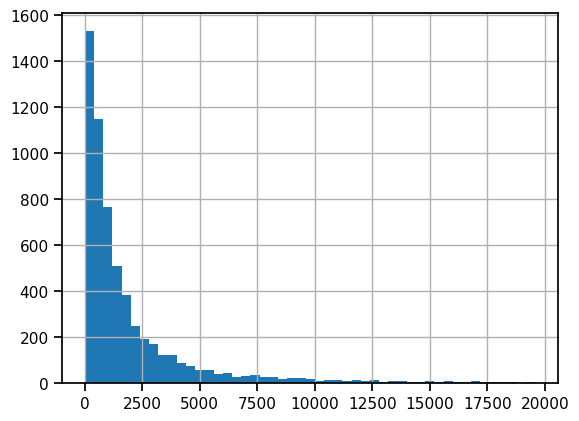

In [54]:
df.review_count.hist(bins=np.arange(0, 20000, 400));

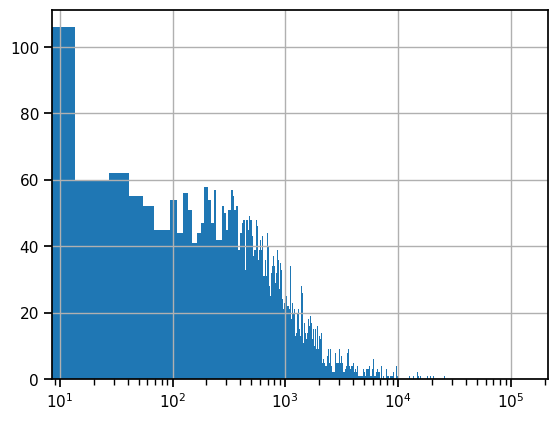

In [55]:
df.review_count.hist(bins=10000)
plt.xscale('log');

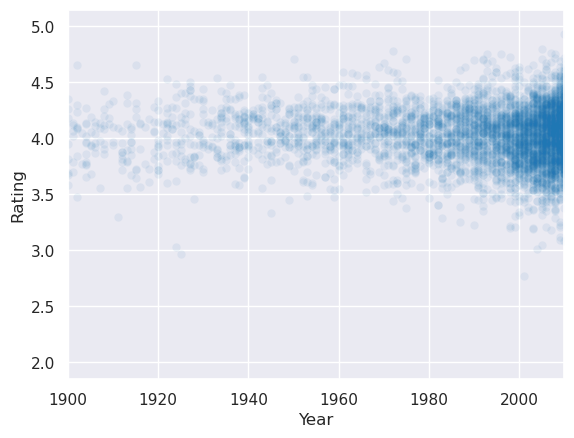

In [57]:
with sns.axes_style('darkgrid'):
    plt.scatter(df.year, df.rating, lw=0, alpha=.08)
    plt.xlim([1900,2010])
    plt.xlabel('Year')
    plt.ylabel('Rating');